In [1]:
import tensorflow as tf
import keras.api._v2.keras as keras
import os

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imghdr

data_dir = 'Panda_Bear_Dataset'

In [3]:
image_exts = ['jpeg','jpg','bmp','png']

In [4]:
for image_class in os.listdir(data_dir): #iamge_class: happy, sad
    for image in os.listdir(os.path.join(data_dir,image_class)): # /data/happy
        image_path = os.path.join(data_dir,image_class,image) # /data/happy/img1.png
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext lust {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [5]:
data = keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

Found 616 files belonging to 2 classes.


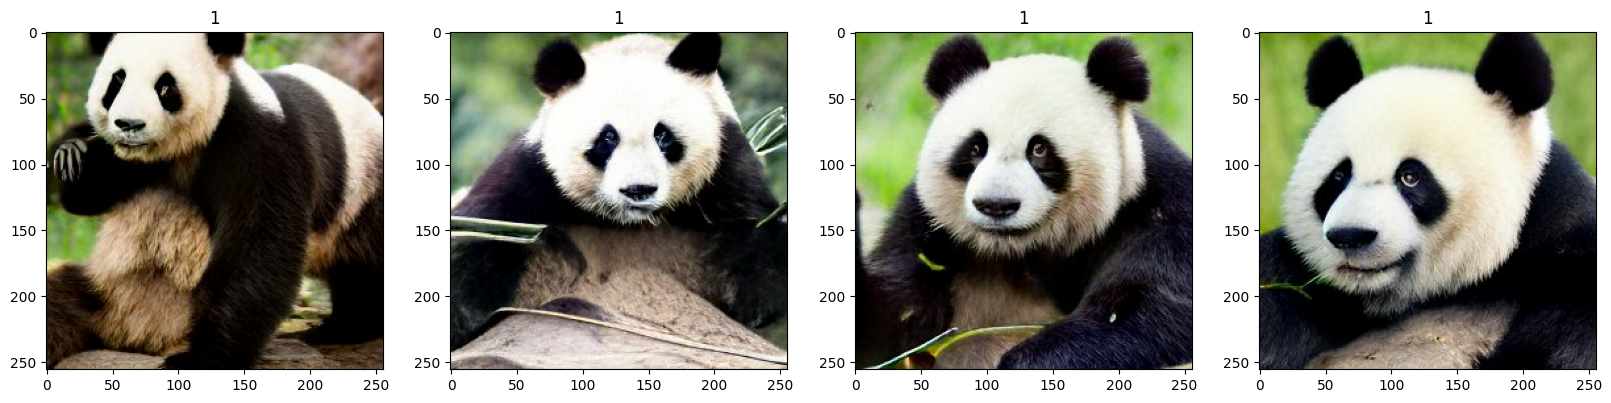

In [6]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Split data and scaling

In [18]:
import tensorflow as tf
from tensorflow import keras

# Create training dataset 
train_data = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=1337,
    shuffle=True
)

# Create validation dataset
val_data = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=1337,
    shuffle=True
)

val_data = val_data.map(lambda x, y: (x / 255.0, y))
train_data = train_data.map(lambda x, y: (x / 255.0, y))




Found 616 files belonging to 2 classes.
Using 493 files for training.
Found 616 files belonging to 2 classes.
Using 123 files for validation.


## Scaling Done

In [42]:
class_names = [f.name for f in os.scandir(data_dir) if f.is_dir()]
print(class_names[0])

Bears


In [20]:
train_data.as_numpy_iterator().next()

(array([[[[0.41960785, 0.5529412 , 0.25490198],
          [0.42745098, 0.56078434, 0.2627451 ],
          [0.41568628, 0.56078434, 0.25882354],
          ...,
          [0.60784316, 0.57254905, 0.4509804 ],
          [0.6156863 , 0.5803922 , 0.4509804 ],
          [0.62352943, 0.5882353 , 0.45882353]],
 
         [[0.42352942, 0.5568628 , 0.25882354],
          [0.41960785, 0.5647059 , 0.2627451 ],
          [0.41960785, 0.5647059 , 0.2627451 ],
          ...,
          [0.61960787, 0.58431375, 0.4627451 ],
          [0.61960787, 0.58431375, 0.45490196],
          [0.61960787, 0.58431375, 0.45490196]],
 
         [[0.4117647 , 0.5568628 , 0.25490198],
          [0.41568628, 0.5647059 , 0.2627451 ],
          [0.41960785, 0.5686275 , 0.27450982],
          ...,
          [0.6313726 , 0.5882353 , 0.4627451 ],
          [0.6156863 , 0.5803922 , 0.4509804 ],
          [0.60784316, 0.57254905, 0.44313726]],
 
         ...,
 
         [[0.04705882, 0.03137255, 0.        ],
          [0.18039

In [21]:
val_data.as_numpy_iterator().next()

(array([[[[0.38431373, 0.52156866, 0.16862746],
          [0.36862746, 0.5058824 , 0.15294118],
          [0.3529412 , 0.49019608, 0.12941177],
          ...,
          [0.45490196, 0.6627451 , 0.30980393],
          [0.45882353, 0.67058825, 0.3254902 ],
          [0.46666667, 0.6862745 , 0.34509805]],
 
         [[0.37254903, 0.50980395, 0.15686275],
          [0.36078432, 0.49803922, 0.14509805],
          [0.34509805, 0.48235294, 0.12156863],
          ...,
          [0.4745098 , 0.68235296, 0.32156864],
          [0.46666667, 0.6784314 , 0.33333334],
          [0.46666667, 0.6862745 , 0.3372549 ]],
 
         [[0.36078432, 0.5019608 , 0.14901961],
          [0.34901962, 0.49019608, 0.13725491],
          [0.3372549 , 0.48235294, 0.11764706],
          ...,
          [0.47843137, 0.69411767, 0.32941177],
          [0.47058824, 0.6901961 , 0.33333334],
          [0.46666667, 0.69803923, 0.3372549 ]],
 
         ...,
 
         [[0.01568628, 0.02352941, 0.01960784],
          [0.01176

## Building Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [66]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Add this callback during model training
hist = model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[early_stopping])


Epoch 1/20
16/16 [==============================] - 6s 225ms/step - loss: 0.3955 - accuracy: 0.8337 - val_loss: 0.0318 - val_accuracy: 0.9919
Epoch 2/20
16/16 [==============================] - 3s 170ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.9140 - val_accuracy: 0.7561
Epoch 3/20
16/16 [==============================] - 3s 170ms/step - loss: 0.1818 - accuracy: 0.9412 - val_loss: 0.0247 - val_accuracy: 0.9919
Epoch 4/20
16/16 [==============================] - 3s 170ms/step - loss: 0.0120 - accuracy: 0.9980 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 3s 166ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0179 - val_accuracy: 0.9919
Epoch 6/20
16/16 [==============================] - 3s 167ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9919
Epoch 7/20
16/16 [==============================] - 3s 170ms/step - loss: 9.7926e-04 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9919
Ep

## Plot Performance

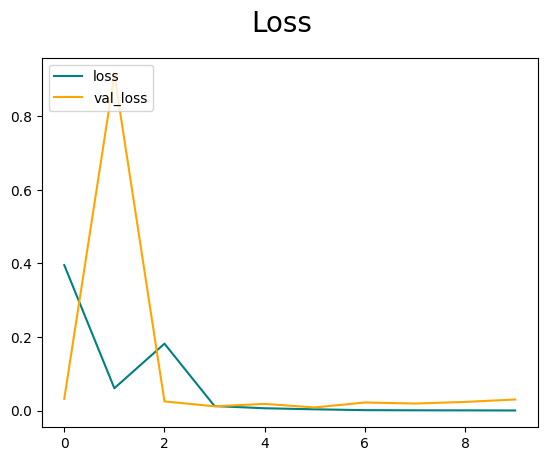

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

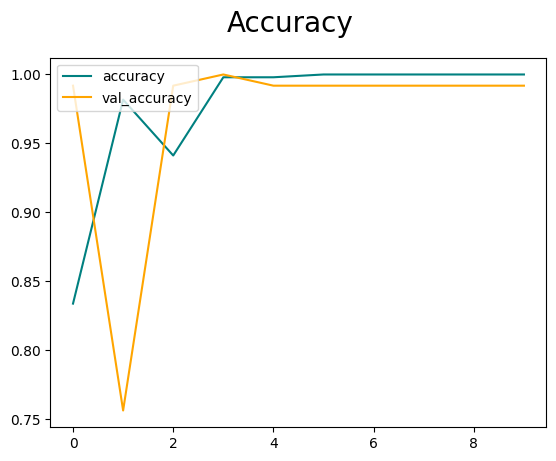

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

## Evaluate

In [69]:
model.evaluate(val_data)

4/4 [==============================] - 1s 42ms/step - loss: 0.0299 - accuracy: 0.9919


[0.02991027571260929, 0.9918699264526367]

4/4 [==============================] - 1s 143ms/step


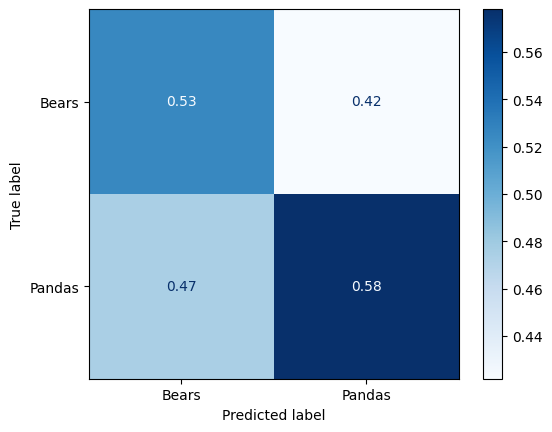

In [70]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict class probabilities for the validation data
y_pred_prob = model.predict(val_data)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Extract true labels from validation data
y_test = tf.concat([y for x, y in val_data], axis=0).numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='pred')

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
display.plot(cmap=plt.cm.Blues)
plt.show()


## Test Deploy Our Model

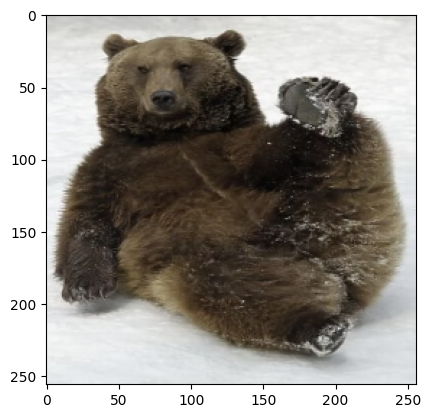

1/1 [==============================] - 1s 613ms/step
Bears


In [71]:
from matplotlib.pyplot import imread, imshow, show

img = imread('test/bear/Screenshot 2024-01-03 223857.jpg')
imshow(img)

resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

y_pred = model.predict(np.expand_dims(resize/255,0))

label_map={i:names for i,names in enumerate(class_names)}
pred =np.argmax(y_pred,axis=1)[0]

print(label_map[pred])



In [72]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental import preprocessing

rescaling = preprocessing.Rescaling(1./255)
# Create test dataset with rescaling
test_data = image_dataset_from_directory(
    'test',
    labels="inferred",
    image_size=(256, 256),
    shuffle=False,  # No need to shuffle test data
)

test_data = test_data.map(lambda x, y: (x / 255.0, y))

evaluation_result = model.evaluate(test_data)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

Found 47 files belonging to 2 classes.
2/2 [==============================] - 1s 189ms/step - loss: 0.2641 - accuracy: 0.8511
Test Loss: 0.26406627893447876
Test Accuracy: 0.8510638475418091
